In [1]:
import numpy as np
import math
import os

import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}'
mpl.rc('font', family='serif')

In [2]:
num_data = 50
dims = 4
outlier_subspace_size = 2
frac_abnormal_devices = 0.1

In [3]:
def create_data(num_devices, n, dims):
    data = np.random.normal(loc=0.5, scale=0.3*0.5/2, size=(num_devices, n, dims))
    return data


def circle(shape, snr=0.0, margin=0.0):
    random_data = np.random.uniform(low=-1, high=1, size=shape)
    circle = random_data/np.linalg.norm(random_data, keepdims=True, axis=-1)
    noise = np.random.uniform(low=-1, high=1, size=shape)*snr
    circle = circle*(1-2*(snr+margin))
    circle = circle*0.5
    circle = circle+0.5
    circle = circle+noise
    return circle


def add_hidden_outliers(data, indices, subspace_size, frac_outlying=0.05):
    outlying = np.random.choice(range(len(data[0])), int(len(data[0])*frac_outlying))
    c = circle(shape=(len(data), len(data[0]), subspace_size))
    data[:, :, :subspace_size] = c
    outliers = np.empty(shape=data.shape, dtype=bool)
    outliers.fill(False)
    for i in indices:
        num_outlying_data = int(len(data[0]) * frac_outlying)
        outlier_indices = np.random.choice(range(len(data[i])), num_outlying_data, replace=False)
        data[i][outlier_indices, :subspace_size] = np.random.uniform(low=0.45, high=0.55, size=subspace_size)
        outliers[i][outlier_indices, :subspace_size] = True
    return data, outliers

In [9]:
data = create_data(4, num_data, dims)
data, outliers = add_hidden_outliers(data, np.array([0]), outlier_subspace_size)

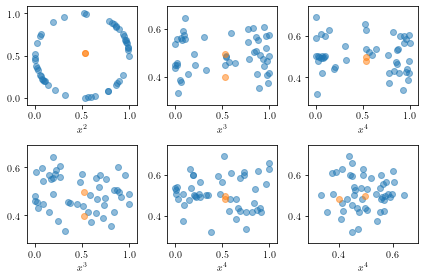

In [12]:
i = 0
ax4=plt.subplot(234)
x = 1
y = 2
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))

ax5=plt.subplot(2, 3, 5)
x = 1
y = 3
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))

ax6=plt.subplot(2, 3, 6)
x = 2
y = 3
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))

ax1=plt.subplot(231)
x = 0
y = 1
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))

ax2=plt.subplot(232)
x = 0
y = 2
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))

ax3=plt.subplot(233)
x = 0
y = 3
plt.scatter(data[i][np.invert(outliers[i].any(-1))].T[x], data[i][np.invert(outliers[i].any(-1))].T[y], alpha=0.5, label="ok")
plt.scatter(data[i][outliers[i].any(-1)].T[x], data[i][outliers[i].any(-1)].T[y], alpha=0.5, label="outlier")
plt.xlabel(r"$x^{}$".format(x+1))
plt.xlabel(r"$x^{}$".format(y+1))
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "figures", "hidden_outliers.pdf"))
plt.show()